# Transformación de variable para conseguir una relación no lineal

In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
data_auto = pd.read_csv("../datasets/auto/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [4]:
data_auto.shape

(406, 9)

In [5]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CV vs MPG')

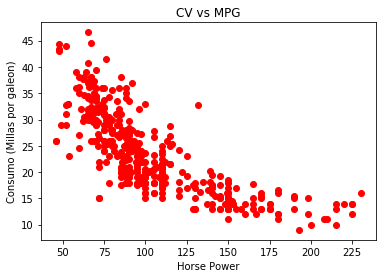

In [6]:
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"],data_auto["mpg"],"ro")
plt.xlabel("Horse Power")
plt.ylabel("Consumo (Millas por galeon)")
plt.title("CV vs MPG")

## Modelo de regresión lineal
* mpg= a+ b* horsepower 

Probablemente no se ajuste bien, vemos que no es tan lineal, pero es el primer paso

In [11]:
x = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
y = data_auto["mpg"].fillna(data_auto["mpg"].mean())

In [20]:
x_data=x[:,np.newaxis]
lm = LinearRegression()
lm.fit(x_data,y)  # asi lo lee, ya que espera un array o un df

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
type(x)

pandas.core.series.Series

In [18]:
type(x[:,np.newaxis])

numpy.ndarray

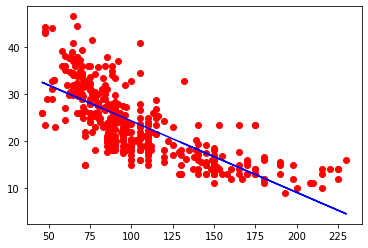

In [22]:
%matplotlib inline
plt.plot(x,y,"ro")
plt.plot(x,lm.predict(x_data),color="blue")

In [25]:
lm.score(x_data,y) # R^2

0.574653340645025

In [27]:
SSD= np.sum((y-lm.predict(x_data))**2)
RSE = np.sqrt(SSD/len(x_data)-1)
y_mean= np.mean(y)
error = RSE/y_mean
SSD, RSE, error*100

(10315.75196006092, 4.940471238582748, 21.010252948625173)

# Modelo de regresión cuadrático

* mpg= a + b * horsepower^2

In [28]:
x_data= x**2
x_data= x_data[:,np.newaxis]

In [29]:
lm = LinearRegression()
lm.fit(x_data,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
lm.score(x_data,y)

0.4849887034823205

In [32]:
SSD= np.sum((y-lm.predict(x_data))**2)
RSE = np.sqrt(SSD/len(x_data)-1)
y_mean= np.mean(y)
error = RSE/y_mean
SSD, RSE, error*100

(12490.350340501926, 5.455676832957554, 23.20125848951901)

# Modelo de regresión lineal y cuadrático

* mpg = a + b* horsepower + c* horsepower^2

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [34]:
poly = PolynomialFeatures(degree=2)

In [44]:
x_data = poly.fit_transform(x[:,np.newaxis])

In [45]:
lm = linear_model.LinearRegression()
lm.fit(x_data,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
lm.score(x_data,y)

0.6547512489366876

In [47]:
lm.intercept_

-40.693812896755176

In [48]:
lm.coef_

array([ 0.00000000e+00,  4.00021432e+00, -7.54801920e-02,  6.19621369e-04,
       -2.36220932e-06,  3.41982935e-09])

* mpg = 36.101549643342835 -1.42176401e-03 * hp +2.06560352e-08* hp^2


Vemos que el polinomio de grado 2 mejora el R^2 pero aún asi es bajo, podemos ver como cambia este con un polinomio más grande, para eso podemos hacer un bucle que recorra los distintos polinomios

In [62]:
for i in range(2,6):
    poly = PolynomialFeatures(degree=i)
    x_data = poly.fit_transform(x[:, np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(x_data,y)
    print("Regresión de grado: ", i)
    print("R^2: ",lm.score(x_data,y))
    print("intercepto: ",lm.intercept_)
    print("coeficientes: ", lm.coef_)
    regresion_validation(lm,x_data,y)

Regresión de grado:  2
R^2:  0.6439066584257469
intercepto:  55.026192447080355
coeficientes:  [ 0.         -0.43404318  0.00112615]
SSD:8636.180643524502, RSE: 4.50237502829124
 error: 19.147169094968504
Regresión de grado:  3
R^2:  0.6444678885560744
intercepto:  58.448774111918084
coeficientes:  [ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD:8622.56936742855, RSE: 4.498650418158693
 error: 19.131329512620837
Regresión de grado:  4
R^2:  0.6467674189704502
intercepto:  40.096643848138505
coeficientes:  [ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
SSD:8566.799832491353, RSE: 4.4833572463338855
 error: 19.066292516571412
Regresión de grado:  5
R^2:  0.6547512489366876
intercepto:  -40.693812896755176
coeficientes:  [ 0.00000000e+00  4.00021432e+00 -7.54801920e-02  6.19621369e-04
 -2.36220932e-06  3.41982935e-09]
SSD:8373.171393636556, RSE: 4.4298504332735416
 error: 18.838745057516654


EL R^2 NO MEJORA EL MODELO

In [60]:
def regresion_validation(lm,x_data,y):
    SSD= np.sum((y-lm.predict(x_data))**2)
    RSE = np.sqrt(SSD/len(x_data)-1)
    y_mean= np.mean(y)
    error = RSE/y_mean
    print("SSD:" + str(SSD)+", RSE: " +str(RSE))
    print(" error: " +str(error*100))
    return 0

In [57]:
regresion_validation(lm,x_data,y)

SSD:8462.848188816919, RSE: 4.454711401093986 error: 18.94447084706806


0

# EL problema de los outliers

son los puntos que se alejan del resto de datos,son puntos conflictivos, que trastean el modelo. Generalmente se sacan del data set


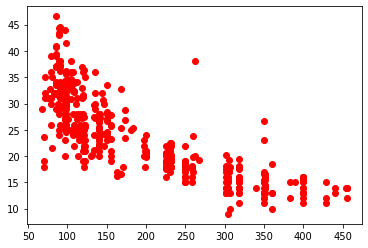

In [65]:
plt.plot(data_auto["displacement"],data_auto["mpg"],"ro")

Vemos que hay 3 outliers que molestan para la regresión

In [67]:
x = data_auto["displacement"].fillna(data_auto["displacement"].mean())
x = x[:,np.newaxis]
y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
lm = LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
lm.score(x,y)

0.6261049762826918

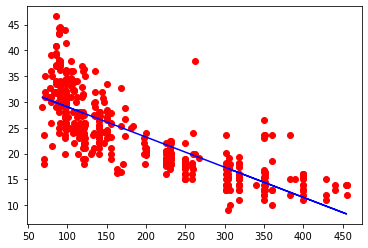

In [71]:
%matplotlib inline
plt.plot(x,y,"ro")
plt.plot(x,lm.predict(x),color="blue")

**Veamos ahora que sucede con este modelo si quitamos esos puntos outliers**

In [75]:
data_auto[(data_auto["displacement"]>250) & (data_auto["mpg"]>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [77]:
data_auto[(data_auto["displacement"]>300) & (data_auto["mpg"]>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


Con esto encontramos los puntos outliers, veremos ahora como queda el modelo sin ellos

In [78]:
data_auto_clean=data_auto.drop([395,258,305,372])

In [79]:
x = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
x = x[:,np.newaxis]
y = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())
lm = LinearRegression()
lm.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
lm.score(x,y)

0.6466514317531822

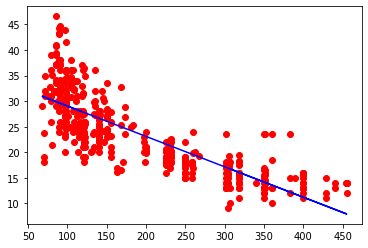

In [83]:
%matplotlib inline
plt.plot(x,y,"ro")
plt.plot(x,lm.predict(x),color="blue")

Vemos que el R^2 aumento un poco, y la representación gráfica está la prueba que quitamos esos outliers

In [85]:
lm.get_params

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>